## APAN5420 Anomaly Detection - Assignment 6


## Data

* The Medicare Inpatient Hospitals by Geography and Service dataset provides information on hospital discharges for Original Medicare Part A beneficiaries by IPPS hospitals. This dataset contains information on the number of discharges, payments, and submitted charges organized by geography and Medicare Severity Diagnosis Related Group (DRG).

## Table of Contents
* [Section 1: Data preparation](#Section_1)
    * [Section 1.1: Load data](#Section_11)
    * [Section 1.2: data preparation](#Section_12)
* [Section 2: EDA](#Section_2)
    * [Section 2.1: Distribution plots](#Section_21)
    * [Section 2.2: Count by state](#Section_22)    
    * [Section 2.3: Count of top cities](#Section_23)
    * [Section 2.4: Correlation Matrix](#Section_24)
* [Section 3: Feature engineering](#Section_3)
    * [Section 3.1: State & DRG Total Payment average](#Section_31)
    * [Section 3.2: City & DRG Total Payment average](#Section_32)
    * [Section 3.3: Region & DRG Total Payment average](#Section_33)
    * [Section 3.4: State & DRG Total Discharges average](#Section_34)
    * [Section 3.5: City & DRG Total Discharges average](#Section_35)
    * [Section 3.6: Region & DRG Total Discharges average](#Section_36)
    * [Section 3.7: State & DRG Medicare Payments average](#Section_37) 
    * [Section 3.8: City & DRG Medicare Payments average](#Section_38)
    * [Section 3.9: Region & DRG Medicare Payments average](#Section_39)
    * [Section 3.10: Zipcode & DRG Medicare Payments average](#Section_40)
* [Section 4: Unsupervised learning](#Section_4)
    * [Section 4.1: ECOD](#Section_41)
    * [Section 4.2: PCA](#Section_42)    
    * [Section 4.3: GMM](#Section_43)

## Section 1: Data preparation <a class="anchor" id="Section_1"></a>
### Section 1.1: Load Data <a class="anchor" id="Section_11"></a>
* Import packages and data 
* Rename column
* Change data type and transfer spending amount with dollar sign into numeric
* Understand the data strcuture. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('inpatientCharges.csv')

In [3]:
df.describe()

,Provider Id,Provider Zip Code,Total Discharges
count,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304
std,151563.671767,27854.323080,51.104042
min,10001.000000,1040.000000,11.000000
25%,110092.000000,27261.000000,17.000000
50%,250007.000000,44309.000000,27.000000
75%,380075.000000,72901.000000,49.000000
max,670077.000000,99835.000000,3383.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   DRG Definition                        163065 non-null  object
 1   Provider Id                           163065 non-null  int64 
 2   Provider Name                         163065 non-null  object
 3   Provider Street Address               163065 non-null  object
 4   Provider City                         163065 non-null  object
 5   Provider State                        163065 non-null  object
 6   Provider Zip Code                     163065 non-null  int64 
 7   Hospital Referral Region Description  163065 non-null  object
 8    Total Discharges                     163065 non-null  int64 
 9    Average Covered Charges              163065 non-null  object
 10   Average Total Payments               163065 non-null  object
 11  Average Medic

In [5]:
df.columns = ['DRG','Provider_Id', 'Provider_Name','Provider_StreetAddress','Provider_City',
               'Provider_State','Provider_Zipcode','Hospital_referral_region_desp',
                'Total_Discharges','Average_Covered_Charges','Average_Total_Payments',
                'Average_Medicare_Payment']
df = df.drop('Average_Covered_Charges',axis=1)

In [6]:
df.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$5658.33,$4851.44


In [7]:
# Distribution plots of average total payments 
df['Average_Total_Payments'].describe()

count       163065
unique      147842
top       $4370.00
freq             9
Name: Average_Total_Payments, dtype: object

In [8]:
# Change data type and transfer spending amount with dollar sign into numeric
df['DRG'] = df['DRG'].astype('category')
df['Provider_State'] = df['Provider_State'].astype('category')
df['Provider_City'] = df['Provider_City'].astype('category')
df['Provider_Id'] = df['Provider_Id'].astype('category')
df['Average_Total_Payments'] = (df['Average_Total_Payments']
                              .str.replace(r'[^-+\d.]', '').astype(float))
df['Average_Medicare_Payment'] = (df['Average_Medicare_Payment']
                              .str.replace(r'[^-+\d.]', '').astype(float))

/var/folders/4q/w1lktl152hx0j0gq933rclnh0000gn/T/ipykernel_2301/976114077.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Average_Total_Payments'] = (df['Average_Total_Payments']
/var/folders/4q/w1lktl152hx0j0gq933rclnh0000gn/T/ipykernel_2301/976114077.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Average_Medicare_Payment'] = (df['Average_Medicare_Payment']


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   DRG                            163065 non-null  category
 1   Provider_Id                    163065 non-null  category
 2   Provider_Name                  163065 non-null  object  
 3   Provider_StreetAddress         163065 non-null  object  
 4   Provider_City                  163065 non-null  category
 5   Provider_State                 163065 non-null  category
 6   Provider_Zipcode               163065 non-null  int64   
 7   Hospital_referral_region_desp  163065 non-null  object  
 8   Total_Discharges               163065 non-null  int64   
 9   Average_Total_Payments         163065 non-null  float64 
 10  Average_Medicare_Payment       163065 non-null  float64 
dtypes: category(4), float64(2), int64(2), object(3)
memory usage: 9.9+ MB


## Section 2: EDA <a class="anchor" id="Section_2"></a>

### Section 2.1: Distribution plots <a class="anchor" id="Section_21"></a>

In [10]:
# Distribution plots of average total payments 
df['Average_Total_Payments'].describe()

count    163065.000000
mean       9707.473804
std        7664.642598
min        2673.000000
25%        5234.500000
50%        7214.100000
75%       11286.400000
max      156158.180000
Name: Average_Total_Payments, dtype: float64

<AxesSubplot:xlabel='Average_Total_Payments', ylabel='Count'>

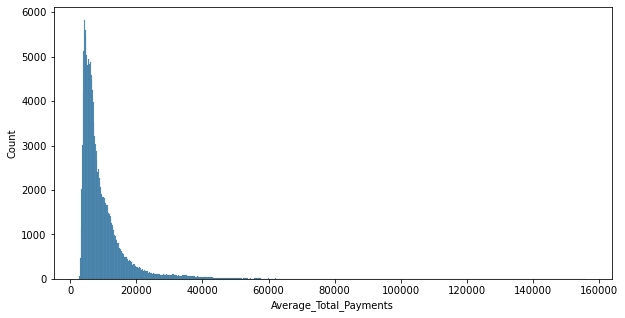

In [11]:
plt.figure(figsize=(10,5)) # Plot a graph with reasonable size.
sns.histplot(df['Average_Total_Payments'])
# plt.plot(data['Average_Total_Payments'])

<AxesSubplot:xlabel='Average_Total_Payments'>

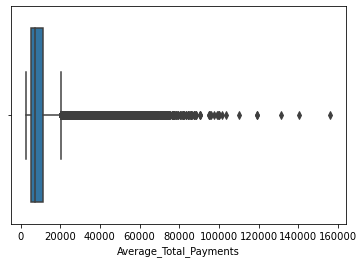

In [12]:
sns.boxplot(x = 'Average_Total_Payments', data = df) 

In [13]:
# Distribution plots of Total_Discharges
df['Total_Discharges'].describe()

count    163065.000000
mean         42.776304
std          51.104042
min          11.000000
25%          17.000000
50%          27.000000
75%          49.000000
max        3383.000000
Name: Total_Discharges, dtype: float64

<AxesSubplot:xlabel='Total_Discharges', ylabel='Count'>

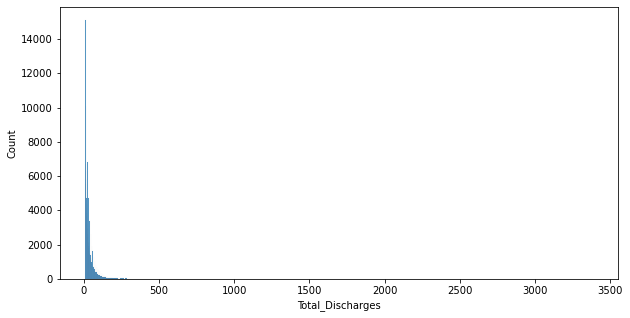

In [14]:
plt.figure(figsize=(10,5)) 
sns.histplot(df['Total_Discharges'])

<AxesSubplot:xlabel='Total_Discharges'>

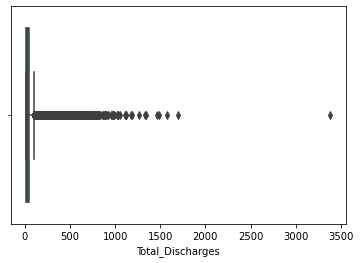

In [15]:
sns.boxplot(x = 'Total_Discharges', data = df)

In [16]:
# Distribution plots of Average_Medicare_Payment
df['Average_Medicare_Payment'].describe()

count    163065.000000
mean       8494.490964
std        7309.467261
min        1148.900000
25%        4192.350000
50%        6158.460000
75%       10056.880000
max      154620.810000
Name: Average_Medicare_Payment, dtype: float64

<AxesSubplot:xlabel='Average_Medicare_Payment', ylabel='Count'>

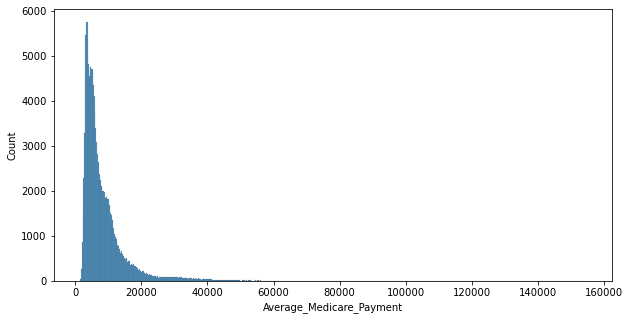

In [17]:
plt.figure(figsize=(10,5)) 
sns.histplot(df['Average_Medicare_Payment'])

<AxesSubplot:xlabel='Average_Medicare_Payment'>

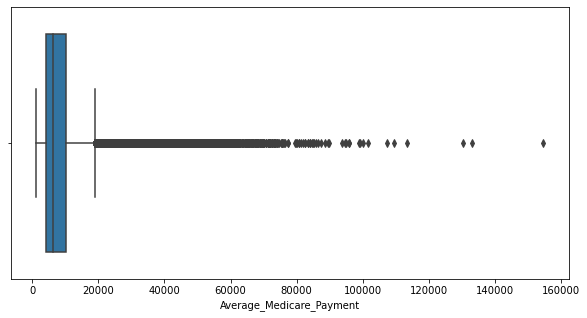

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'Average_Medicare_Payment', data = df)

* We find that most of the all of the discharges are over and mosty less that 50.
* We also find that the average total payment and average medicare payment follow similar pattern, mostly less than 10,000 dollars but significant number of outliers upto 156,158 dollars.

### Section 2.2: Count by State <a class="anchor" id="Section_22"></a>

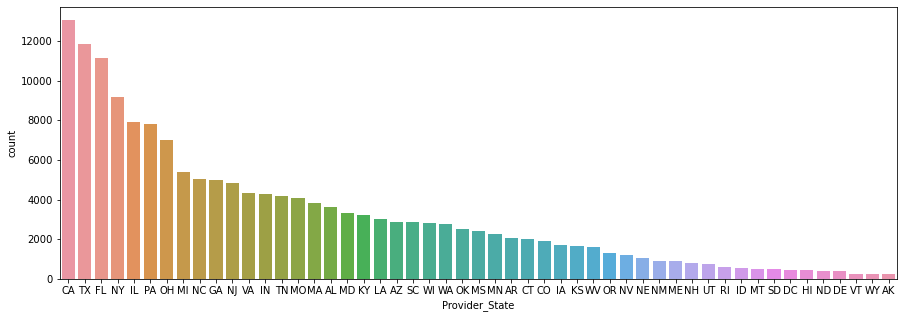

In [19]:
# data['Provider_State'].value_counts()
plt.figure(figsize=(15,5))
sns.countplot(x='Provider_State',data=df,order=df['Provider_State'].value_counts().index)
#plt.xticks(rotation = 90)
#ax = plt.gca()
#for p in ax.patches:
#    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
#            fontsize=12, color='blue', ha='center', va='bottom')
plt.rcParams["axes.labelsize"] = 20

* From this histogram, California, Texas, and Florid has the highest number of hospital divisions.

### Section 2.3: Count of top 20 cities <a class="anchor" id="Section_23"></a>

In [20]:
df['Provider_Name'].value_counts()

GOOD SAMARITAN HOSPITAL                  633
ST JOSEPH MEDICAL CENTER                 427
MERCY MEDICAL CENTER                     357
MERCY HOSPITAL                           347
ST JOSEPH HOSPITAL                       343
                                        ... 
J PAUL JONES HOSPITAL                      1
GREATER BATON ROUGE SURGICAL HOSPITAL      1
FAIRWAY MEDICAL CENTER                     1
MONROE SURGICAL HOSPITAL                   1
EAGLEVILLE HOSPITAL                        1
Name: Provider_Name, Length: 3201, dtype: int64

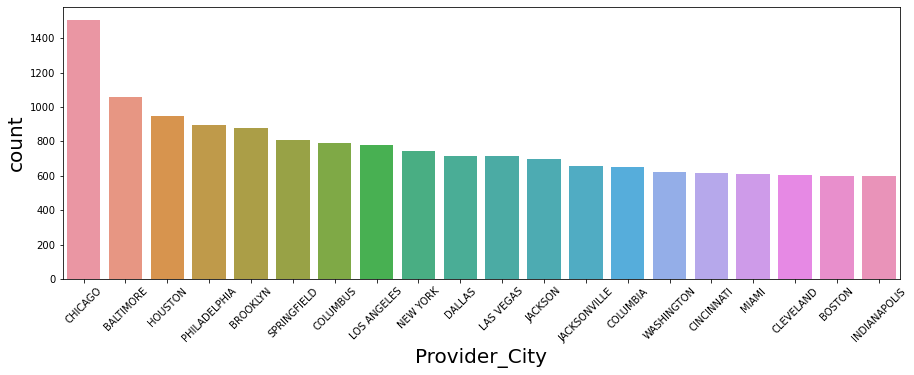

In [21]:
plt.figure(figsize=(15,5))
txt = df['Provider_City'].value_counts()[:20].index

chart = sns.countplot(
    x='Provider_City' ,data=df , order=txt
)

_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.rcParams["axes.labelsize"] = 10

* Even though the number of hospital divisions in State Illinois and State Maryland are not ranking top in the State group bys, their hospital divisions rank the most when looking at the city group bys (Chicago and Baltimore).

#### Thought process:
- The following shows the average medicare payment by DRG. Does it make sense to compare "917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC" with "885 - PSYCHOSES"?

In [22]:
df.groupby('DRG')['Average_Total_Payments'].describe().reset_index()

,DRG,count,mean,std,min,25%,50%,75%,max
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,1079.0,6960.534004,1477.873952,4968.00,6001.8300,6582.890,7516.825,18420.56
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,1201.0,6706.276445,2033.965862,4194.09,5412.8700,6093.750,7345.360,25519.43
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,1659.0,13263.823032,3847.918207,8174.28,10762.2200,12084.700,14424.325,50882.40
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,2269.0,7922.671141,2084.658336,5368.73,6626.2700,7280.050,8503.060,26510.15
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,1806.0,5713.985221,1342.538675,3916.41,4819.3250,5326.025,6197.480,14744.05
...,...,...,...,...,...,...,...,...,...
95,885 - PSYCHOSES,613.0,6968.721876,2440.280958,4444.90,5477.2400,6155.560,7841.280,32200.77
96,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,906.0,4949.907307,1462.463278,3172.44,3969.9675,4529.535,5440.675,18630.92
97,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,843.0,10763.814413,2823.004637,6942.83,8851.4550,10062.280,11788.675,33251.14
98,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,1382.0,4485.378734,1154.328951,3040.72,3720.5725,4136.105,4879.390,12479.80


In [23]:
# Distribution plots of average total payments 
df['Total_Discharges'].describe()

count    163065.000000
mean         42.776304
std          51.104042
min          11.000000
25%          17.000000
50%          27.000000
75%          49.000000
max        3383.000000
Name: Total_Discharges, dtype: float64

### Section 2.4: Correlation Matrix <a class="anchor" id="Section_24"></a>
* To examine the correlation between the variables and find that the charges a highly correlated.

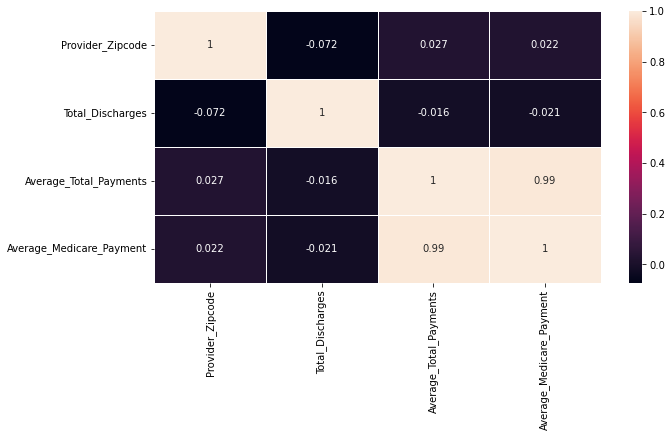

In [24]:
corr_matrix = df.corr()
ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(corr_matrix, annot=True, linewidths=.5)
plt.show()

## Section 3: Feature Engineering <a class="anchor" id="Section_3"></a>

### Section 3.1: State & DRG Total Payment average <a class="anchor" id="Section_31"></a>
- Calculating average ratio of Average Total Payment of every Provider state in DRG description. This will help understand the average total payment comparisons within the state in each DRG category. 

In [25]:
benchmark = df.groupby(['Provider_State','DRG'])['Average_Total_Payments'].mean().reset_index()
benchmark.columns = ['Provider_State','DRG','Avg_Payment_ByStateDRG']
benchmark.head()

,Provider_State,DRG,Avg_Payment_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,8401.950000
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8799.000000
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21608.010000
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,12555.548333
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,9275.867500


In [26]:
# add the new feature average spending to the dataset 
df1 = pd.merge(df, benchmark, how='left', on=['Provider_State','DRG'])
# Feature 1: ratio of amount spending and average spending by drg in a state
df1['Avg_Payment_ByStateDRG_ratio_amount'] = np.where(df1['Avg_Payment_ByStateDRG']==0,0, df1['Average_Total_Payments'] / df1['Avg_Payment_ByStateDRG'])
df1['Avg_Payment_ByStateDRG_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.195274
min           0.384805
25%           0.880824
50%           0.956830
75%           1.064688
max           7.857934
Name: Avg_Payment_ByStateDRG_ratio_amount, dtype: float64

In [27]:
len(df1[df1['Avg_Payment_ByStateDRG_ratio_amount']>2]['Provider_Name'].unique())

124

In [28]:
df1[df1['Avg_Payment_ByStateDRG_ratio_amount']>7].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Avg_Payment_ByStateDRG,Avg_Payment_ByStateDRG_ratio_amount
20388,189 - PULMONARY EDEMA & RESPIRATORY FAILURE,390096,ST JOSEPH MEDICAL CENTER,2500 BERNVILLE ROAD,READING,PA,19605,PA - Reading,143,72797.93,7718.09,9264.257684,7.857934
38923,203 - BRONCHITIS & ASTHMA W/O CC/MCC,220008,STURDY MEMORIAL HOSPITAL,211 PARK STREET,ATTLEBORO,MA,2703,RI - Providence,11,41482.09,1790.18,5711.287429,7.263177


### Section 3.2: City & DRG Total Payment average <a class="anchor" id="Section_32"></a>
- Calculating average ratio of Average Total Payment of every Provider city in DRG description. This will help understand the average total payment comparisons within the city. 

In [29]:
benchmark = df.groupby(['Provider_City','DRG'])['Average_Total_Payments'].median().reset_index()
benchmark.columns = ['Provider_City','DRG','Average_Payment_ByCityDRG']
benchmark.head()

,Provider_City,DRG,Average_Payment_ByCityDRG
0,ABBEVILLE,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,NaN
1,ABBEVILLE,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,NaN
2,ABBEVILLE,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN
3,ABBEVILLE,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN
4,ABBEVILLE,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN


In [30]:
# add the new feature average spending to the dataset 
df1 = pd.merge(df1, benchmark, how='left', on=['Provider_City','DRG'])
# Feature 3: ratio of amount spending and average spending by drg in a city
df1['Average_Payment_ByCityDRG_ratio_amount'] = np.where(df1['Average_Payment_ByCityDRG']==0,0, df1['Average_Total_Payments'] / df1['Average_Payment_ByCityDRG'])
df1['Average_Payment_ByCityDRG_ratio_amount'].describe()

count    163065.000000
mean          1.011287
std           0.120431
min           0.238195
25%           1.000000
50%           1.000000
75%           1.000000
max           5.591943
Name: Average_Payment_ByCityDRG_ratio_amount, dtype: float64

In [31]:
len(df1[df1['Average_Payment_ByCityDRG_ratio_amount']>2]['Provider_Name'].unique())

58

In [32]:
df1[df1['Average_Payment_ByCityDRG_ratio_amount']>5].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Avg_Payment_ByStateDRG,Avg_Payment_ByStateDRG_ratio_amount,Average_Payment_ByCityDRG,Average_Payment_ByCityDRG_ratio_amount
37716,202 - BRONCHITIS & ASTHMA W CC/MCC,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,MD - Baltimore,17,41458.47,37236.0,8374.755758,4.950409,7413.965,5.591943


### Section 3.3: Region & DRG Total Payment average <a class="anchor" id="Section_33"></a>
- Calculating average ratio of Average Total Payment of every Hospital referral region desp in DRG description. This will help understand the average total payment comparisons within the region. 

In [33]:
benchmark = df.groupby(['Hospital_referral_region_desp','DRG'])['Average_Total_Payments'].mean().reset_index()
benchmark.columns = ['Hospital_referral_region_desp','DRG','Avg_Payment_ByRegionDRG']
benchmark.head()

,Hospital_referral_region_desp,DRG,Avg_Payment_ByRegionDRG
0,AK - Anchorage,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,8401.950000
1,AK - Anchorage,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8799.000000
2,AK - Anchorage,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21608.010000
3,AK - Anchorage,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,12555.548333
4,AK - Anchorage,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,9275.867500


In [34]:
# add the new feature average spending to the dataset 
df1 = pd.merge(df1, benchmark, how='left', on=['Hospital_referral_region_desp','DRG'])
# Feature 3: ratio of amount spending and average spending by drg in a region 
df1['Avg_Payment_ByRegionDRG_ratio_amount'] = np.where(df1['Avg_Payment_ByRegionDRG']==0,0, df1['Average_Total_Payments'] / df1['Avg_Payment_ByRegionDRG'])
df1['Avg_Payment_ByRegionDRG_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.159145
min           0.271255
25%           0.902856
50%           0.977701
75%           1.057561
max           4.848303
Name: Avg_Payment_ByRegionDRG_ratio_amount, dtype: float64

In [35]:
len(df1[df1['Avg_Payment_ByRegionDRG_ratio_amount']>2]['Provider_Name'].unique())

64

In [36]:
df1[df1['Avg_Payment_ByRegionDRG_ratio_amount']>4].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Avg_Payment_ByStateDRG,Avg_Payment_ByStateDRG_ratio_amount,Average_Payment_ByCityDRG,Average_Payment_ByCityDRG_ratio_amount,Avg_Payment_ByRegionDRG,Avg_Payment_ByRegionDRG_ratio_amount
37716,202 - BRONCHITIS & ASTHMA W CC/MCC,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,MD - Baltimore,17,41458.47,37236.0,8374.755758,4.950409,7413.965,5.591943,9473.928889,4.376059
162713,948 - SIGNS & SYMPTOMS W/O MCC,390312,CANCER TREATMENT CENTERS OF AMERICA,1331 EAST WYOMING AVENUE,PHILADELPHIA,PA,19124,PA - Philadelphia,24,28968.20,8894.2,5018.809241,5.771927,6071.325,4.771314,5974.915484,4.848303


### Section 3.4: State & DRG Total Discharges average <a class="anchor" id="Section_34"></a>
- Calculating average ratio of total discharges of every Provider state in DRG description. This will help understand the total discharges comparisons within the state. 

In [37]:
benchmark = df.groupby(['Provider_State','DRG'])['Total_Discharges'].mean().reset_index()
benchmark.columns = ['Provider_State','DRG','Avg_Discharges_ByStateDRG']
benchmark.head()

,Provider_State,DRG,Avg_Discharges_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,23.000000
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,11.000000
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,22.500000
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,25.333333
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21.000000


In [38]:
# add the new feature average total discharges to the dataset 
df1 = pd.merge(df1, benchmark, how='left', on=['Provider_State','DRG'])
# Feature 4: ratio of amount total discharges and average total discharges by drg in a state 
df1['Avg_Discharges_ByStateDRG_ratio_amount'] = np.where(df1['Avg_Discharges_ByStateDRG']==0,0, df1['Total_Discharges'] / df1['Avg_Discharges_ByStateDRG'])
df1['Avg_Discharges_ByStateDRG_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.686087
min           0.045025
25%           0.550452
50%           0.819820
75%           1.251471
max          24.624593
Name: Avg_Discharges_ByStateDRG_ratio_amount, dtype: float64

In [39]:
len(df1[df1['Avg_Discharges_ByStateDRG_ratio_amount']>2]['Provider_Name'].unique())

1227

In [40]:
df1[df1['Avg_Discharges_ByStateDRG_ratio_amount']>24].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Avg_Payment_ByStateDRG,Avg_Payment_ByStateDRG_ratio_amount,Average_Payment_ByCityDRG,Average_Payment_ByCityDRG_ratio_amount,Avg_Payment_ByRegionDRG,Avg_Payment_ByRegionDRG_ratio_amount,Avg_Discharges_ByStateDRG,Avg_Discharges_ByStateDRG_ratio_amount
112969,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,330270,HOSPITAL FOR SPECIAL SURGERY,535 EAST 70TH STREET,NEW YORK,NY,10021,NY - Manhattan,3383,19023.7,14880.39,16761.400426,1.134971,23075.93,0.824396,22709.351,0.837703,137.382979,24.624593


### Section 3.5: City & DRG Total Discharge average <a class="anchor" id="Section_35"></a>
- Calculating average ratio of total discharges of every Provider city in DRG description. This will help understand the total discharges comparisons within the city. 

In [41]:
benchmark = df.groupby(['Provider_City','DRG'])['Total_Discharges'].mean().reset_index()
benchmark.columns = ['Provider_City','DRG','Avg_Discharges_ByCityDRG']
benchmark.head()

,Provider_City,DRG,Avg_Discharges_ByCityDRG
0,ABBEVILLE,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,NaN
1,ABBEVILLE,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,NaN
2,ABBEVILLE,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN
3,ABBEVILLE,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN
4,ABBEVILLE,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN


In [42]:
# add the new feature average total discharges to the dataset 
df1 = pd.merge(df1, benchmark, how='left', on=['Provider_City','DRG'])
# Feature 5: ratio of amount total discharges and average total discharges by drg in a city
df1['Avg_Discharges_ByCityDRG_ratio_amount'] = np.where(df1['Avg_Discharges_ByCityDRG']==0,0, df1['Total_Discharges'] / df1['Avg_Discharges_ByCityDRG'])
df1['Avg_Discharges_ByCityDRG_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.356433
min           0.019540
25%           0.920000
50%           1.000000
75%           1.000000
max           5.689303
Name: Avg_Discharges_ByCityDRG_ratio_amount, dtype: float64

In [43]:
len(df1[df1['Avg_Discharges_ByCityDRG_ratio_amount']>2]['Provider_Name'].unique())

430

In [44]:
df1[df1['Avg_Discharges_ByCityDRG_ratio_amount']>5].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,...,Avg_Payment_ByStateDRG,Avg_Payment_ByStateDRG_ratio_amount,Average_Payment_ByCityDRG,Average_Payment_ByCityDRG_ratio_amount,Avg_Payment_ByRegionDRG,Avg_Payment_ByRegionDRG_ratio_amount,Avg_Discharges_ByStateDRG,Avg_Discharges_ByStateDRG_ratio_amount,Avg_Discharges_ByCityDRG,Avg_Discharges_ByCityDRG_ratio_amount
23231,190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,450184,MEMORIAL HERMANN HOSPITAL SYSTEM,1635 NORTH LOOP WEST,HOUSTON,TX,77008,TX - Houston,312,8000.42,...,7610.829312,1.051189,8000.420,1.000000,7960.970870,1.004955,49.944954,6.246877,58.800000,5.306122
102629,"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...",140281,NORTHWESTERN MEMORIAL HOSPITAL,251 E HURON ST,CHICAGO,IL,60611,IL - Chicago,448,6321.75,...,5176.980720,1.221127,6409.780,0.986266,6596.742222,0.958314,106.760000,4.196328,87.370370,5.127596
111610,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,50625,CEDARS-SINAI MEDICAL CENTER,8700 BEVERLY BLVD,LOS ANGELES,CA,90048,CA - Los Angeles,738,18690.78,...,17684.594213,1.056896,19646.745,0.951342,17916.616610,1.043209,126.514894,5.833305,131.250000,5.622857
111715,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,80001,"CHRISTIANA CARE HEALTH SERVICES, INC.",4755 OGLETOWN-STANTON ROAD,NEWARK,DE,19718,DE - Wilmington,1031,15631.40,...,14818.714000,1.054842,15631.400,1.000000,16596.194000,0.941867,363.400000,2.837094,189.571429,5.438583
112969,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,330270,HOSPITAL FOR SPECIAL SURGERY,535 EAST 70TH STREET,NEW YORK,NY,10021,NY - Manhattan,3383,19023.70,...,16761.400426,1.134971,23075.930,0.824396,22709.351000,0.837703,137.382979,24.624593,614.111111,5.508775


### Section 3.6: Region & DRG Total Discharge average <a class="anchor" id="Section_36"></a>
- Calculating average ratio of total discharges of every Hospital referral region desp in DRG description. This will help understand the total discharges comparisons within the region. 

In [45]:
benchmark = df.groupby(['Hospital_referral_region_desp','DRG'])['Total_Discharges'].mean().reset_index()
benchmark.columns = ['Hospital_referral_region_desp','DRG','Avg_Discharges_ByRegionDRG']
benchmark.head()

,Hospital_referral_region_desp,DRG,Avg_Discharges_ByRegionDRG
0,AK - Anchorage,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,23.000000
1,AK - Anchorage,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,11.000000
2,AK - Anchorage,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,22.500000
3,AK - Anchorage,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,25.333333
4,AK - Anchorage,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21.000000


In [46]:
# add the new feature average total discharges to the dataset 
df1 = pd.merge(df1, benchmark, how='left', on=['Hospital_referral_region_desp','DRG'])
# Feature 6: ratio of amount total discharges and average total discharges by drg in a region
df1['Avg_Discharges_ByRegionDRG_ratio_amount'] = np.where(df1['Avg_Discharges_ByRegionDRG']==0,0, df1['Total_Discharges'] / df1['Avg_Discharges_ByRegionDRG'])
df1['Avg_Discharges_ByRegionDRG_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.596288
min           0.015412
25%           0.592105
50%           0.886894
75%           1.250000
max          11.008786
Name: Avg_Discharges_ByRegionDRG_ratio_amount, dtype: float64

In [47]:
len(df1[df1['Avg_Discharges_ByRegionDRG_ratio_amount']>2]['Provider_Name'].unique())

1123

In [48]:
df1[df1['Avg_Discharges_ByRegionDRG_ratio_amount']>11].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,...,Average_Payment_ByCityDRG,Average_Payment_ByCityDRG_ratio_amount,Avg_Payment_ByRegionDRG,Avg_Payment_ByRegionDRG_ratio_amount,Avg_Discharges_ByStateDRG,Avg_Discharges_ByStateDRG_ratio_amount,Avg_Discharges_ByCityDRG,Avg_Discharges_ByCityDRG_ratio_amount,Avg_Discharges_ByRegionDRG,Avg_Discharges_ByRegionDRG_ratio_amount
112969,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,330270,HOSPITAL FOR SPECIAL SURGERY,535 EAST 70TH STREET,NEW YORK,NY,10021,NY - Manhattan,3383,19023.7,...,23075.93,0.824396,22709.351,0.837703,137.382979,24.624593,614.111111,5.508775,307.3,11.008786


### Section 3.7: State & DRG Medicare Payments average <a class="anchor" id="Section_37"></a>
- Calculating average ratio of Average medicare payment of every Provider state in DRG description. This will help understand the average medicare payment comparisons within the state. 

In [49]:
benchmark = df.groupby(['Provider_State','DRG'])['Average_Medicare_Payment'].mean().reset_index()
benchmark.columns = ['Provider_State','DRG','Avg_Medicare_ByStateDRG']
benchmark.head()

,Provider_State,DRG,Avg_Medicare_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,6413.780000
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8081.540000
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,20555.255000
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,11140.963333
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,8258.427500


In [50]:
# add the new feature average total discharges to the dataset 
df1 = pd.merge(df1, benchmark, how='left', on=['Provider_State','DRG'])
# Feature 7: ratio of amount total medicare payment and average medicare payment by drg in a state
df1['Avg_Medicare_ByStateDRG_ratio_amount'] = np.where(df1['Avg_Medicare_ByStateDRG']==0,0, df1['Average_Medicare_Payment'] / df1['Avg_Medicare_ByStateDRG'])
df1['Avg_Medicare_ByStateDRG_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.215091
min           0.339831
25%           0.868395
50%           0.954250
75%           1.071483
max           5.174415
Name: Avg_Medicare_ByStateDRG_ratio_amount, dtype: float64

In [51]:
len(df1[df1['Avg_Medicare_ByStateDRG_ratio_amount']>2]['Provider_Name'].unique())

94

In [52]:
df1[df1['Avg_Medicare_ByStateDRG_ratio_amount']>5].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,...,Avg_Payment_ByRegionDRG,Avg_Payment_ByRegionDRG_ratio_amount,Avg_Discharges_ByStateDRG,Avg_Discharges_ByStateDRG_ratio_amount,Avg_Discharges_ByCityDRG,Avg_Discharges_ByCityDRG_ratio_amount,Avg_Discharges_ByRegionDRG,Avg_Discharges_ByRegionDRG_ratio_amount,Avg_Medicare_ByStateDRG,Avg_Medicare_ByStateDRG_ratio_amount
37716,202 - BRONCHITIS & ASTHMA W CC/MCC,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,MD - Baltimore,17,41458.47,...,9473.928889,4.376059,25.727273,0.660777,23.8,0.714286,26.166667,0.649682,7196.176364,5.174415
109462,460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC,150166,PINNACLE HOSPITAL,9301 CONNECTICUT DR,CROWN POINT,IN,46307,IN - Gary,14,131187.35,...,43758.768333,2.997967,44.641026,0.313613,13.5,1.037037,19.833333,0.705882,25432.459231,5.129923


### Section 3.8: City & DRG Medicare Payments average <a class="anchor" id="Section_38"></a>
- Calculating average ratio of Average medicare payment of every Provider city in DRG description. This will help understand the average medicare payment comparisons within the city. 

In [53]:
benchmark = df.groupby(['Provider_City','DRG'])['Average_Medicare_Payment'].mean().reset_index()
benchmark.columns = ['Provider_City','DRG','Avg_Medicare_ByCityDRG']
benchmark.head()

,Provider_City,DRG,Avg_Medicare_ByCityDRG
0,ABBEVILLE,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,NaN
1,ABBEVILLE,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,NaN
2,ABBEVILLE,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN
3,ABBEVILLE,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN
4,ABBEVILLE,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN


In [54]:
# add the new feature average total discharges to the dataset 
df1 = pd.merge(df1, benchmark, how='left', on=['Provider_City','DRG'])
# Feature 8: ratio of amount total medicare payment and average medicare payment by drg in a city
df1['Avg_Medicare_ByCityDRG_ratio_amount'] = np.where(df1['Avg_Medicare_ByCityDRG']==0,0, df1['Average_Medicare_Payment'] / df1['Avg_Medicare_ByCityDRG'])
df1['Avg_Medicare_ByCityDRG_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.119402
min           0.261737
25%           0.979755
50%           1.000000
75%           1.000000
max           3.846861
Name: Avg_Medicare_ByCityDRG_ratio_amount, dtype: float64

In [55]:
len(df1[df1['Avg_Medicare_ByCityDRG_ratio_amount']>2]['Provider_Name'].unique())

14

In [56]:
df1[df1['Avg_Medicare_ByCityDRG_ratio_amount']>3].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,...,Avg_Discharges_ByStateDRG,Avg_Discharges_ByStateDRG_ratio_amount,Avg_Discharges_ByCityDRG,Avg_Discharges_ByCityDRG_ratio_amount,Avg_Discharges_ByRegionDRG,Avg_Discharges_ByRegionDRG_ratio_amount,Avg_Medicare_ByStateDRG,Avg_Medicare_ByStateDRG_ratio_amount,Avg_Medicare_ByCityDRG,Avg_Medicare_ByCityDRG_ratio_amount
37716,202 - BRONCHITIS & ASTHMA W CC/MCC,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,MD - Baltimore,17,41458.47,...,25.727273,0.660777,23.8,0.714286,26.166667,0.649682,7196.176364,5.174415,9679.581,3.846861


### Section 3.9: Region & BRG Medicare Payments average <a class="anchor" id="Section_39"></a>
- Calculating average ratio of Average medicare payment of every Hospital referral region desp in DRG description. This will help understand the average medicare payment comparisons within the region. 

In [57]:
benchmark = df.groupby(['Hospital_referral_region_desp','DRG'])['Average_Medicare_Payment'].mean().reset_index()
benchmark.columns = ['Hospital_referral_region_desp','DRG','Avg_Medicare_ByRegionDRG']
benchmark.head()

,Hospital_referral_region_desp,DRG,Avg_Medicare_ByRegionDRG
0,AK - Anchorage,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,6413.780000
1,AK - Anchorage,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8081.540000
2,AK - Anchorage,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,20555.255000
3,AK - Anchorage,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,11140.963333
4,AK - Anchorage,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,8258.427500


In [58]:
# add the new feature average total discharges to the dataset 
df1 = pd.merge(df1, benchmark, how='left', on=['Hospital_referral_region_desp','DRG'])
# Feature 9: ratio of amount total medicare payment and average medicare payment by drg in a region
df1['Avg_Medicare_ByRegionDRG_ratio_amount'] = np.where(df1['Avg_Medicare_ByRegionDRG']==0,0, df1['Average_Medicare_Payment'] / df1['Avg_Medicare_ByRegionDRG'])
df1['Avg_Medicare_ByRegionDRG_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.175920
min           0.339831
25%           0.893506
50%           0.976954
75%           1.063344
max           4.516504
Name: Avg_Medicare_ByRegionDRG_ratio_amount, dtype: float64

In [59]:
len(df1[df1['Avg_Medicare_ByRegionDRG_ratio_amount']>2]['Provider_Name'].unique())

52

In [60]:
df1[df1['Avg_Medicare_ByRegionDRG_ratio_amount']>4].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,...,Avg_Discharges_ByCityDRG,Avg_Discharges_ByCityDRG_ratio_amount,Avg_Discharges_ByRegionDRG,Avg_Discharges_ByRegionDRG_ratio_amount,Avg_Medicare_ByStateDRG,Avg_Medicare_ByStateDRG_ratio_amount,Avg_Medicare_ByCityDRG,Avg_Medicare_ByCityDRG_ratio_amount,Avg_Medicare_ByRegionDRG,Avg_Medicare_ByRegionDRG_ratio_amount
37716,202 - BRONCHITIS & ASTHMA W CC/MCC,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,MD - Baltimore,17,41458.47,...,23.8,0.714286,26.166667,0.649682,7196.176364,5.174415,9679.581,3.846861,8244.430556,4.516504


### Section 3.10: Zipcode & BRG Medicare Payments average <a class="anchor" id="Section_40"></a>
- Calculating average ratio of Average medicare payment of every Provider zipcode in DRG description. This will help understand the average medical payments comparisons within cities in a Zipcode.

In [61]:
benchmark = df.groupby(['Provider_Zipcode','DRG'])['Average_Medicare_Payment'].mean().reset_index()
benchmark.columns = ['Provider_Zipcode','DRG','Avg_Medicare_ByZipDRG']
benchmark.head()

,Provider_Zipcode,DRG,Avg_Medicare_ByZipDRG
0,1040,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,NaN
1,1040,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,6359.30
2,1040,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,10862.94
3,1040,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,6701.50
4,1040,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN


In [62]:
# add the new feature average total discharges to the dataset 
df1 = pd.merge(df1, benchmark, how='left', on=['Provider_Zipcode','DRG'])
# Feature 10: ratio of amount total medicare payment and average medicare payment by drg in a region and state
df1['Avg_Medicare_ByZipDRG_ratio_amount'] = np.where(df1['Avg_Medicare_ByZipDRG']==0,0, df1['Average_Medicare_Payment'] / df1['Avg_Medicare_ByZipDRG'])
df1['Avg_Medicare_ByZipDRG_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.038675
min           0.261737
25%           1.000000
50%           1.000000
75%           1.000000
max           1.782259
Name: Avg_Medicare_ByZipDRG_ratio_amount, dtype: float64

In [63]:
len(df1[df1['Avg_Medicare_ByZipDRG_ratio_amount']>2]['Provider_Name'].unique())

0

In [64]:
df1[df1['Avg_Medicare_ByZipDRG_ratio_amount']>1.7].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,...,Avg_Discharges_ByRegionDRG,Avg_Discharges_ByRegionDRG_ratio_amount,Avg_Medicare_ByStateDRG,Avg_Medicare_ByStateDRG_ratio_amount,Avg_Medicare_ByCityDRG,Avg_Medicare_ByCityDRG_ratio_amount,Avg_Medicare_ByRegionDRG,Avg_Medicare_ByRegionDRG_ratio_amount,Avg_Medicare_ByZipDRG,Avg_Medicare_ByZipDRG_ratio_amount
92330,377 - G.I. HEMORRHAGE W MCC,330350,UNIVERSITY HOSPITAL OF BROOKLYN ( DOWNSTATE ),445 LENOX ROAD,BROOKLYN,NY,11203,NY - Manhattan,25,61176.80,...,36.708333,0.681044,15243.649700,3.852510,23995.333846,2.447406,21198.882500,2.770255,32950.503333,1.782259
109462,460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC,150166,PINNACLE HOSPITAL,9301 CONNECTICUT DR,CROWN POINT,IN,46307,IN - Gary,14,131187.35,...,19.833333,0.705882,25432.459231,5.129923,75055.705000,1.738263,41102.023333,3.174213,75055.705000,1.738263


In [65]:
df1.columns

Index(['DRG', 'Provider_Id', 'Provider_Name', 'Provider_StreetAddress',
       'Provider_City', 'Provider_State', 'Provider_Zipcode',
       'Hospital_referral_region_desp', 'Total_Discharges',
       'Average_Total_Payments', 'Average_Medicare_Payment',
       'Avg_Payment_ByStateDRG', 'Avg_Payment_ByStateDRG_ratio_amount',
       'Average_Payment_ByCityDRG', 'Average_Payment_ByCityDRG_ratio_amount',
       'Avg_Payment_ByRegionDRG', 'Avg_Payment_ByRegionDRG_ratio_amount',
       'Avg_Discharges_ByStateDRG', 'Avg_Discharges_ByStateDRG_ratio_amount',
       'Avg_Discharges_ByCityDRG', 'Avg_Discharges_ByCityDRG_ratio_amount',
       'Avg_Discharges_ByRegionDRG', 'Avg_Discharges_ByRegionDRG_ratio_amount',
       'Avg_Medicare_ByStateDRG', 'Avg_Medicare_ByStateDRG_ratio_amount',
       'Avg_Medicare_ByCityDRG', 'Avg_Medicare_ByCityDRG_ratio_amount',
       'Avg_Medicare_ByRegionDRG', 'Avg_Medicare_ByRegionDRG_ratio_amount',
       'Avg_Medicare_ByZipDRG', 'Avg_Medicare_ByZipDRG_ratio_amou

In [66]:
features = ['Avg_Payment_ByStateDRG_ratio_amount','Average_Payment_ByCityDRG_ratio_amount',
            'Avg_Payment_ByRegionDRG_ratio_amount','Avg_Discharges_ByStateDRG_ratio_amount',
            'Avg_Discharges_ByCityDRG_ratio_amount','Avg_Discharges_ByRegionDRG_ratio_amount',
           'Avg_Medicare_ByStateDRG_ratio_amount','Avg_Medicare_ByCityDRG_ratio_amount',
           'Avg_Medicare_ByRegionDRG_ratio_amount','Avg_Medicare_ByZipDRG_ratio_amount']

## Conclusion

In the data preparation section, I imported and overviewed the shape and column names of the dataset, then I transformed data types into correct formats. After transforming the data types, In EDA section, I performed exploratory data analysis. To overview the distribution of outliers, I plotted the variable distributions. Another interesting finding is even though the number of hospital divisions in State Illinois and State Maryland are not ranking top in the State group bys, their hospital divisions rank the most when looking at the city group bys (Chicago and Baltimore).

Now we have some understanding of the dataset and numbers. It is time to create features to measure the outliers in the feature engineering section. In this assignment, I created 10 features in ratios to detect anomalies. According to the distributions of the 10 features, we can double confirm the dataset has anomalies.

The transaction aggregation strategy is used by incorporating a combination criteria when grouping transactions. Followed by calculating the average amount total discharges, average total payments and average medical payments to reveal some insights from the dataset.The thought process of these features is to determine the average ratios of one or more variables by dividing their average values by the actual amount. Hospital charges with low or average ratios are considered normal, while hospital charges with high ratios, meaning actual amounts significantly greater than average values, are flagged as potential fraud.

#### Average Total Payments

- Feature 1: State & DRG Total Payment average 
- Feature 2: City & DRG Total Payment average 
- Feature 3: Region & DRG Total Payment average

According to the ratio, we are able to recognize how much higher and lower the spending amount of the individual hospital is compared to the Average Total Payment within the given state, city and region in each DRG category.


#### Total Discharges

- Feature 4:State & DRG Total Discharges average 
- Feature 5: City & DRG Total Discharges average 
- Feature 6: Region & DRG Total Discharges average 

According to the ratio, we are able to recognize how much higher and lower the total discharges of the individual hospital is compared to the Total Discharges within the given state, city and region in each DRG category.

#### Medical Payment Average

- Feature 7: State & DRG Total Discharges average 
- Feature 8: City & DRG Total Discharges average 
- Feature 9: Region & DRG Total Discharges average 
- Feature 10: Zipcode & DRG Total Discharges average 

According to the ratio, we are able to recognize how much higher and lower the spending amount of the individual hospital is compared to the Medical Payment Average within the given state, city and region in each DRG category. 

## Section 4: Unsupervised learning <a class="anchor" id="Section_4"></a>

### Section 4.1: ECOD <a class="anchor" id="Section_41"></a>

The Empirical Cumulative Distribution-based Outlier Detection (ECOD) has a very intuitive approach: Outliers are the rare events in the tails of a distribution, they can be identified by measuring the location in a distribution. The ECOD estimates a variable's non-parametric distribution. It multiplies all tail probabilities to produce an observation's anomaly score. The combined distributions of various dimensions are challenging to determine mathematically. To estimate the empirical cumulative distribution of each variable, ECOD takes the independence of variables as a given. 

In [67]:
#!pip install pyod

In [68]:
# Selecting necessary features
features2 = df1[features]

### Build model

In [69]:
#Build model:
from pyod.models.ecod import ECOD
ecod = ECOD(contamination=0.05) #we still set contamination = 0.05
ecod.fit(features2)

ECOD(contamination=0.05, n_jobs=1)

In [70]:
# Use decision_functions() to generate the outlier scores
y_ecod_scores = ecod.decision_function(features2)
y_pred = ecod.predict(features2)

In [71]:
def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The data:", count_stat(y_pred))
# Threshold for the defined comtanimation rate
print("The threshold for the defined comtanimation rate:" , ecod.threshold_)

The data: {0: 154911, 1: 8154}
The threshold for the defined comtanimation rate: 27.034891332376624


In [72]:
# Search for the high outlier score in the dataset.
np.where(y_ecod_scores>60)

(array([  1554,   2992,  37716,  37727,  50393,  61490,  62531,  71066,
         71380,  80031,  85566,  92330, 109456, 109462, 111541, 112156,
        119632, 130909, 145004, 145683, 145894, 147516, 148250, 157601,
        157780, 157799, 158488]),)

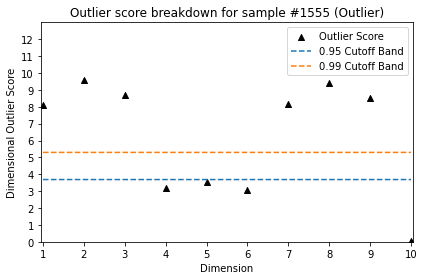

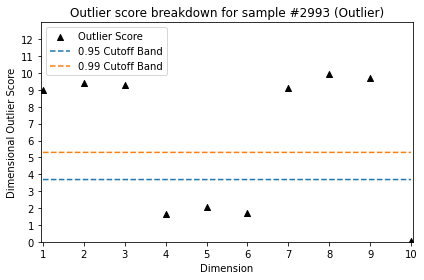

In [73]:
# Now we use function explain_outlier(i) to explain the univariate outliers.
ecod.explain_outlier(1554)
ecod.explain_outlier(2992)

The x-axis is the dimension and the y-axis is the univariate outlier score. The blue and orange dashed lines are the 95 and 99 percentiles for outlier scores. Both graphs show the univariate outlier scores are all about the 99% cutoff band except Variable 4, 5 and 6. This explainability for the outlier scores is a plausible property of ECOD.

### Determine the threshold

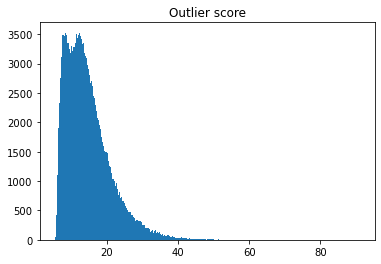

In [74]:
import matplotlib.pyplot as plt
plt.hist(y_ecod_scores, bins='auto') # arguments are passed to np.histogram
plt.title("Outlier score")
plt.show()

### Present the descriptive statistics of the normal and the abnormal groups

In [75]:
threshold = ecod.threshold_ # Use the threshold calculated by the ecod function

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(features2,y_ecod_scores, threshold)

,Group,Count,Count %,Avg_Payment_ByStateDRG_ratio_amount,Average_Payment_ByCityDRG_ratio_amount,Avg_Payment_ByRegionDRG_ratio_amount,Avg_Discharges_ByStateDRG_ratio_amount,Avg_Discharges_ByCityDRG_ratio_amount,Avg_Discharges_ByRegionDRG_ratio_amount,Avg_Medicare_ByStateDRG_ratio_amount,Avg_Medicare_ByCityDRG_ratio_amount,Avg_Medicare_ByRegionDRG_ratio_amount,Avg_Medicare_ByZipDRG_ratio_amount,Anomaly_Score
0,Normal,154911,94.99954,0.98,1.0,0.99,0.98,1.00,0.98,0.98,0.99,0.99,1.00,13.71
1,Outlier,8154,5.00046,1.32,1.2,1.25,1.35,1.08,1.30,1.34,1.16,1.26,1.02,32.39


The table presents the characteristics of the normal and abnormal groups. It shows the count and count percentage of the normal and outlier groups. The “Anomalous_Score” is the average anomaly score. The table tells us several important results:
- The size of the outlier group: The outlier group is about 5%. Remember the size of the outlier group is determined by the threshold. The size will shrink if you choose a higher value for the threshold.
- The average anomaly score: The average outlier score of the outlier group is far higher than that of the normal group (32.39 > 13.71). This evidence just verifies the data in the outlier group are outliers. At this point, you do not need to interpret too much on the scores.
- The feature statistics in each group: The means of the features in the outlier group are larger than those of the normal group. A high average ratio of payment/discharges features, that is more than the average values, could suggest fraudulent behaviour.

### Evaluate the model performance 

In [76]:
# Confusion Matrix
def confusion_matrix(actual,pred):
    Actual_pred = pd.DataFrame({'Actual': actual, 'Pred': pred})
    Actual_pred['Pred'] = np.where(Actual_pred['Pred']<=threshold,0,1)
    cm = pd.crosstab(Actual_pred['Actual'],Actual_pred['Pred'])
    return (cm)
confusion_matrix(y_pred, y_ecod_scores)

Pred,0,1
Actual,,
0,154911,0
1,0,8154


The model delivers a decent job and identifies all 8154 outliers.

### Section 4.2: PCA <a class="anchor" id="Section_42"></a>

Principal Component Analysis (PCA) is one of the popular techniques in data analysis. It performs a linear transformation to convert a set of data points of possibly correlated variables into a set of data points of linearly uncorrelated variables. PCA reduced the dimensionality of a dataset consisting of a large number of related variables while retaining as much variance as possible. PCA finds new variables that the original variables are just their linear combinations.When dimensions are reduced to a few principal dimensions, patterns are identified and then outliers are revealed.

Outliers are different from normal data points. When they are projected to the low-dimensional hyperplane, they will fall onto the eigenvectors with small eigenvalues. The outlier score of a data point is the sum of the weighted euclidean distance between the data point to the low-dimensional hyperplane.


### Build model

In [77]:
# Selecting necessary features
features2 = df1[features]

In [78]:
from pyod.models.pca import PCA
pca = PCA(contamination=0.05) 
pca.fit(features2)

PCA(contamination=0.05, copy=True, iterated_power='auto', n_components=None,
  n_selected_components=None, random_state=None, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)

In [79]:
# Get the prediction labels and outlier scores 
y_pred = pca.labels_  # binary labels (0: inliers, 1: outliers)
y_pca_scores = pca.decision_scores_  # .decision_scores_ yields the raw outlier scores
y_pca_scores = pca.decision_function(features2) 
y_pred = pca.predict(features2) 

In [80]:
y_pca_scores

array([2852.89126981, 1927.76021303, 2772.02765451, ..., 2596.68787687,
       9270.61216686, 3299.06223052])

In [81]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [82]:
# Let's see the default parameters of PCA
pca.get_params()

{'contamination': 0.05,
 'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'n_selected_components': None,
 'random_state': None,
 'standardization': True,
 'svd_solver': 'auto',
 'tol': 0.0,
 'weighted': True,
 'whiten': False}

In [83]:
# Let's see the explained variance ratio here
[pca.explained_variance_,
pca.explained_variance_ratio_]

[array([4.58039555, 2.43319724, 1.02720027, 0.75034172, 0.45218032,
        0.29718598, 0.26144397, 0.10471967, 0.08053324, 0.01286337]),
 array([0.45803675, 0.24331823, 0.1027194 , 0.07503371, 0.04521775,
        0.02971842, 0.02614424, 0.0104719 , 0.00805327, 0.00128633])]

### Determine the threshold

In [84]:
print("The threshold for the defined comtanimation rate:" , pca.threshold_)

The threshold for the defined comtanimation rate: 7009.144884692461


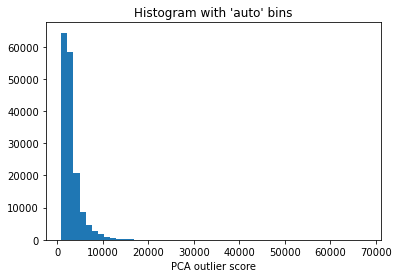

In [85]:
# Get the prediction on the test data
y_pca_pred = pca.predict(features2)  # outlier labels (0 or 1)
y_pca_scores = pca.decision_function(features2)  # outlier scores

import matplotlib.pyplot as plt
plt.hist(y_pca_scores, bins=50)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.xlabel('PCA outlier score')
plt.show()

The table presents the characteristics of the normal and abnormal groups. It shows the count and count percentage of the normal and outlier groups. The “Anomalous_Score” is the average anomaly score. The table tells us several important results:

- The size of the outlier group: The outlier group is about 5%. Remember the size of the outlier group is determined by the threshold. The size will shrink if you choose a higher value for the threshold.
- The average anomaly score: The average score of the outlier group should be higher than that of the normal group (9612.18>2782.99). 
- The feature statistics in each group: The means of the features in the outlier group are larger than those of the normal group. A high average ratio of payment/discharges features, that is more than the average values, could suggest fraudulent behaviour.

### Present the descriptive statistics of the normal and the abnormal groups

In [86]:
threshold = pca.threshold_
threshold

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(features2,y_pca_scores, threshold)

,Group,Count,Count %,Avg_Payment_ByStateDRG_ratio_amount,Average_Payment_ByCityDRG_ratio_amount,Avg_Payment_ByRegionDRG_ratio_amount,Avg_Discharges_ByStateDRG_ratio_amount,Avg_Discharges_ByCityDRG_ratio_amount,Avg_Discharges_ByRegionDRG_ratio_amount,Avg_Medicare_ByStateDRG_ratio_amount,Avg_Medicare_ByCityDRG_ratio_amount,Avg_Medicare_ByRegionDRG_ratio_amount,Avg_Medicare_ByZipDRG_ratio_amount,Anomaly_Score
0,Normal,154911,94.99954,0.98,1.00,0.98,0.96,0.99,0.97,0.98,0.99,0.98,1.00,2782.99
1,Outlier,8154,5.00046,1.41,1.26,1.33,1.70,1.27,1.60,1.44,1.21,1.35,1.02,9612.18


### Evaluate the model performance

In [87]:
# Confusion matrix
Actual_pred = pd.DataFrame({'Actual': y_pca_pred, 'Anomaly_Score': y_pca_scores})
Actual_pred['Pred'] = np.where(Actual_pred['Anomaly_Score']< threshold,0,1)
pd.crosstab(Actual_pred['Actual'],Actual_pred['Pred'])

Pred,0,1
Actual,,
0,154911,0
1,0,8154


The model delivers a decent job and identifies all 8154 outliers.

### Section 4.3: GMM <a class="anchor" id="Section_43"></a>

A Gaussian mixture model (GMM) is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.

GMM describes a data point with the probabilities of coming from different distributions, and K-means identifies a data point to one and only one cluster. The advantage of GMM is its flexibility over K-means. Those data points that have low fit values to the underlying Gaussian distributions are considered outliers.

### Build model

In [88]:
#!pip install combo

In [89]:
# Selecting necessary features
features2 = df1[features]

In [90]:
from pyod.models.gmm import GMM
gmm = GMM(n_components=4, contamination=0.05) 
gmm.fit(features2.values)

GMM(contamination=0.05, covariance_type='full', init_params='kmeans',
  max_iter=100, means_init=None, n_components=4, n_init=1,
  precisions_init=None, random_state=None, reg_covar=1e-06, tol=0.001,
  warm_start=False, weights_init=None)

In [91]:
# Get the prediction labels and outlier scores of the training data
y_gmm_scores = gmm.decision_function(features2.values)
y_pred = gmm.predict(features2.values) 

In [92]:
def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The data:", count_stat(y_pred))
# Threshold for the defined comtanimation rate
print("The threshold for the defined comtanimation rate:" , gmm.threshold_)

The data: {0: 154911, 1: 8154}
The threshold for the defined comtanimation rate: -1.9509842045783141


In [93]:
# Let's see the default parameters of GMM
gmm.get_params()

{'contamination': 0.05,
 'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 4,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'warm_start': False,
 'weights_init': None}

### Determine the threshold

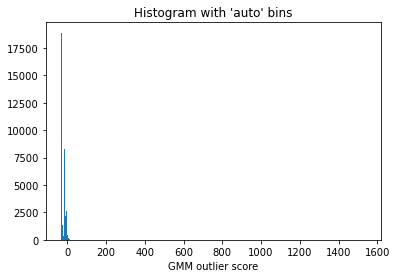

In [94]:
import matplotlib.pyplot as plt
plt.hist(y_gmm_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.xlabel('GMM outlier score')
plt.show()

### Present the summary statistics of the normal and the abnormal groups

In [95]:
threshold = gmm.threshold_ 

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(features2,y_gmm_scores, threshold)

,Group,Count,Count %,Avg_Payment_ByStateDRG_ratio_amount,Average_Payment_ByCityDRG_ratio_amount,Avg_Payment_ByRegionDRG_ratio_amount,Avg_Discharges_ByStateDRG_ratio_amount,Avg_Discharges_ByCityDRG_ratio_amount,Avg_Discharges_ByRegionDRG_ratio_amount,Avg_Medicare_ByStateDRG_ratio_amount,Avg_Medicare_ByCityDRG_ratio_amount,Avg_Medicare_ByRegionDRG_ratio_amount,Avg_Medicare_ByZipDRG_ratio_amount,Anomaly_Score
0,Normal,154911,94.99954,0.98,1.00,0.99,0.97,0.98,0.97,0.99,1.00,0.99,1.00,-18.91
1,Outlier,8154,5.00046,1.29,1.15,1.19,1.65,1.29,1.53,1.24,1.09,1.16,1.01,4.40


The table presents the characteristics of the normal and abnormal groups. It shows the count and count percentage of the normal and outlier groups. The “Anomalous_Score” is the average anomaly score. The table tells us several important results:

- The size of the outlier group: The outlier group is about 5%. Remember the size of the outlier group is determined by the threshold. The size will shrink if you choose a higher value for the threshold.
- The average anomaly score: The average score of the outlier group should be higher than that of the normal group (4.40>-18.91). 
- The feature statistics in each group: The means of the features in the outlier group are larger than those of the normal group. A high average ratio of payment/discharges features, that is more than the average values, could suggest fraudulent behaviour.

### Evaluate the model

In [96]:
Actual_pred = pd.DataFrame({'Actual': y_pred, 'Anomaly_Score': y_gmm_scores})
Actual_pred['Pred'] = np.where(Actual_pred['Anomaly_Score']< threshold,0,1)
pd.crosstab(Actual_pred['Actual'],Actual_pred['Pred'])

Pred,0,1
Actual,,
0,154911,0
1,0,8154


The model delivers a decent job and identifies all 8154 outliers.

### Achieve Model Stability by Aggregating Multiple Models

Distribution-based methods can be very susceptible to noise and overfitting in the training data. The solution is to train the models with a range of hyperparameters and then aggregate the scores. The chance of overfitting will be greatly reduced and the prediction accuracy will be improved.

In order not to assume a large number of mixture components, I produce seven GMM models for a range of clusters. The average prediction of these models will be the final model prediction.

In [97]:
# Selecting necessary features
features2 = df1[features]

In [98]:
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer
from pyod.models.gmm import GMM

# Standardize data
gmm_norm = standardizer(features2)
# Test a range of clusters from 2 to 8. There will be 7 models.
n_clf = 7
k_list = [2, 3, 4, 5, 6, 7, 8]
# Just prepare data frames so we can store the model results
gmm_scores = np.zeros([features2.shape[0], n_clf])
gmm_scores.shape
# Modeling
for i in range(n_clf):
    k = k_list[i]
    gmm = GMM(n_components = k) 
    gmm.fit(gmm_norm)

    # Store the results in each column:
    gmm_scores[:, i] = gmm.decision_function(gmm_norm) 
# Decision scores have to be normalized before combination
gmm_scores_norm = standardizer(gmm_scores)

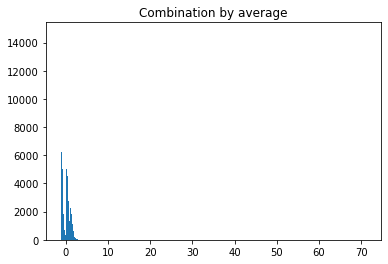

In [99]:
# The predictions are normalized and stored in the data frame “gmm_norm”. 
# The PyOD module offers four aggregation methods and only need to use one method to produce the outcome.
#Combination by average
gmm_by_average = average(gmm_scores_norm)
import matplotlib.pyplot as plt
plt.hist(gmm_by_average, bins='auto') # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [100]:
descriptive_stat_threshold(features2,gmm_by_average, 2.0)

,Group,Count,Count %,Avg_Payment_ByStateDRG_ratio_amount,Average_Payment_ByCityDRG_ratio_amount,Avg_Payment_ByRegionDRG_ratio_amount,Avg_Discharges_ByStateDRG_ratio_amount,Avg_Discharges_ByCityDRG_ratio_amount,Avg_Discharges_ByRegionDRG_ratio_amount,Avg_Medicare_ByStateDRG_ratio_amount,Avg_Medicare_ByCityDRG_ratio_amount,Avg_Medicare_ByRegionDRG_ratio_amount,Avg_Medicare_ByZipDRG_ratio_amount,Anomaly_Score
0,Normal,161225,98.871616,0.99,1.01,1.0,0.98,0.99,0.99,1.00,1.00,1.00,1.00,-0.03
1,Outlier,1840,1.128384,1.45,1.24,1.3,2.41,1.66,2.13,1.34,1.13,1.24,1.02,2.69


## Outliers Identified by Multiple Models

If an outlier is identified by multiple models, the chance that it is an outlier is much higher. In this section, I am going to cross-tabulate the predictions of the three models to identify outliers. I first replicate the ECOD, PCA, GMM models and generate their thresholds.

In [101]:
# Selecting necessary features
features2 = df1[features]

In [102]:
########
# ECOD #
########
from pyod.models.ecod import ECOD
clf_name = 'ECOD'
ecod = ECOD(contamination=0.05) 
ecod.fit(features2)
y_ecod_scores = ecod.decision_function(features2)

########
# PCA  #
########
from pyod.models.pca import PCA
pca = PCA(contamination=0.05) 
pca.fit(features2)
y_pca_scores = pca.decision_function(features2)

########
# GMM  #
########
from pyod.models.gmm import GMM
gmm = GMM(contamination=0.05)  
gmm.fit(features2.values)
y_gmm_scores = gmm.decision_function(features2.values)

# Thresholds
[ecod.threshold_, pca.threshold_, gmm.threshold_]

[27.034891332376624, 7009.144884692461, 3.4482301845290815]

In [103]:
# Put the actual, the ECOD score, the PCA score and the GMM score together
Actual_preds = pd.DataFrame({'Actual': y_pred,
                             'ECOD_Score': y_ecod_scores, 
                             'PCA_Score': y_pca_scores, 
                             'GMM_Score': y_gmm_scores})
Actual_preds['ECOD_pred'] = np.where(Actual_preds['ECOD_Score']>ecod.threshold_,1,0)
Actual_preds['PCA_pred'] = np.where(Actual_preds['PCA_Score']>pca.threshold_,1,0)
Actual_preds['GMM_pred'] = np.where(Actual_preds['GMM_Score']>gmm.threshold_,1,0)
Actual_preds.head()

,Actual,ECOD_Score,PCA_Score,GMM_Score,ECOD_pred,PCA_pred,GMM_pred
0,0,15.072046,2852.891270,-5.874655,0,0,0
1,0,10.105821,1927.760213,-10.909725,0,0,0
2,0,12.787342,2772.027655,-9.441118,0,0,0
3,0,11.302088,1993.439844,-10.979335,0,0,0
4,0,8.154554,1651.174056,-11.247473,0,0,0


In [104]:
# If we cross ECOD and PCA model, 5828 observations are identified by both models to be outliers.
pd.crosstab(Actual_preds['ECOD_pred'],Actual_preds['PCA_pred'])

PCA_pred,0,1
ECOD_pred,,
0,152585,2326
1,2326,5828


In [105]:
# If we cross PCA and GMM model, 5081 observations are identified by both models to be outliers.
pd.crosstab(Actual_preds['PCA_pred'],Actual_preds['GMM_pred'])

GMM_pred,0,1
PCA_pred,,
0,151838,3073
1,3073,5081


In [106]:
# If we cross ECOD and GMM model, 3816 observations are identified by both models to be outliers.
pd.crosstab(Actual_preds['ECOD_pred'],Actual_preds['GMM_pred'])

GMM_pred,0,1
ECOD_pred,,
0,150573,4338
1,4338,3816
